In [1]:
import os
import pandas as pd
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots

In [42]:
def save_image(fig, name):
    os.makedirs(f'figures', exist_ok=True)
    for ext in ['png', 'svg', 'pdf']:
        os.makedirs(f'figures/figures_{ext}', exist_ok=True)
        fig.write_image(f'figures/figures_{ext}/{name}.{ext}', width=2500)


In [43]:
STATES = ['MK', 'SR', 'SL']
STATES_ALL = ['MK', 'SR', 'SL', 'ALL']

# Возраст

In [44]:
vc_age = {s: pd.read_csv(f'csv/{s}_age.csv', index_col=0).sort_index() for s in STATES}
vc_age['ALL'] = vc_age['MK'].add(vc_age['SR'], fill_value=0).add(vc_age['SL'], fill_value=0).astype(int)
vc_age

{'MK':     Age
 15   54
 16   59
 17   32
 18   14
 19    4,
 'SR':     Age
 14    1
 15  125
 16  150
 17   90
 18   98
 19   19,
 'SL':     Age
 15   29
 16   46
 17   21
 18   14
 19   18
 20    4,
 'ALL':     Age
 14    1
 15  208
 16  255
 17  143
 18  126
 19   41
 20    4}

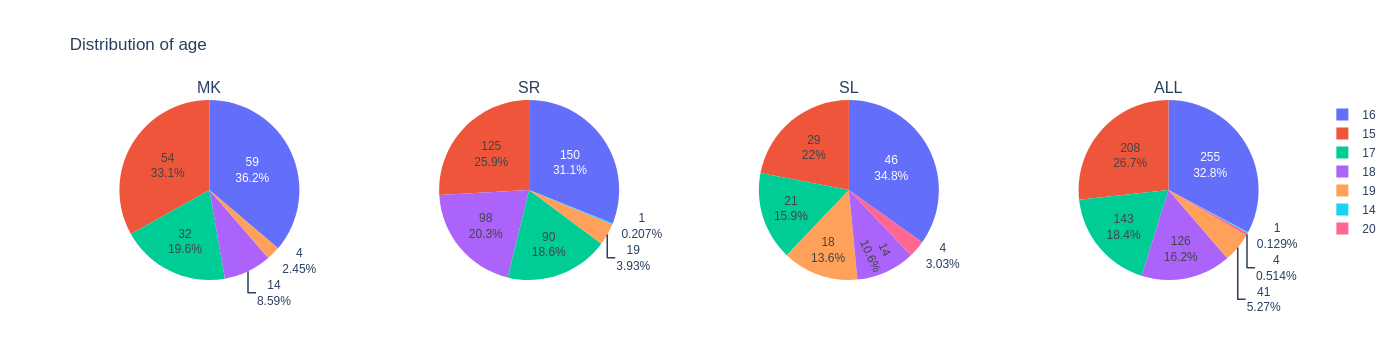

In [45]:
rows, cols = 1, 4
fig = make_subplots(rows=rows, cols=cols, specs=[[{'type': 'domain'}]*cols]*rows, subplot_titles=STATES_ALL)
for index, state in enumerate(STATES_ALL):
    value_counts = vc_age[state]
    fig.add_trace(go.Pie(labels=value_counts.index.tolist(), values=value_counts.values.ravel(), sort=True), row=1+index//cols, col=1+index%cols)
fig.update_layout(title_text='Distribution of age')
fig.update_traces(textinfo='value+percent')
save_image(fig, 'by_age')
fig

# Пол

In [6]:
vc_sex = {s: pd.read_csv(f'csv/{s}_sex.csv', usecols=[1]) for s in STATES}
for k, v in vc_sex.items():
    v.rename(index={0: 'male', 1: 'female'}, inplace=True)
vc_sex['ALL'] = vc_sex['MK'].add(vc_sex['SR'], fill_value=0).add(vc_sex['SL'], fill_value=0).astype(int)
vc_sex

{'MK':         Sex
 male    127
 female   39,
 'SR':         Sex
 male    427
 female   41,
 'SL':         Sex
 male    130
 female    3,
 'ALL':         Sex
 male    684
 female   83}

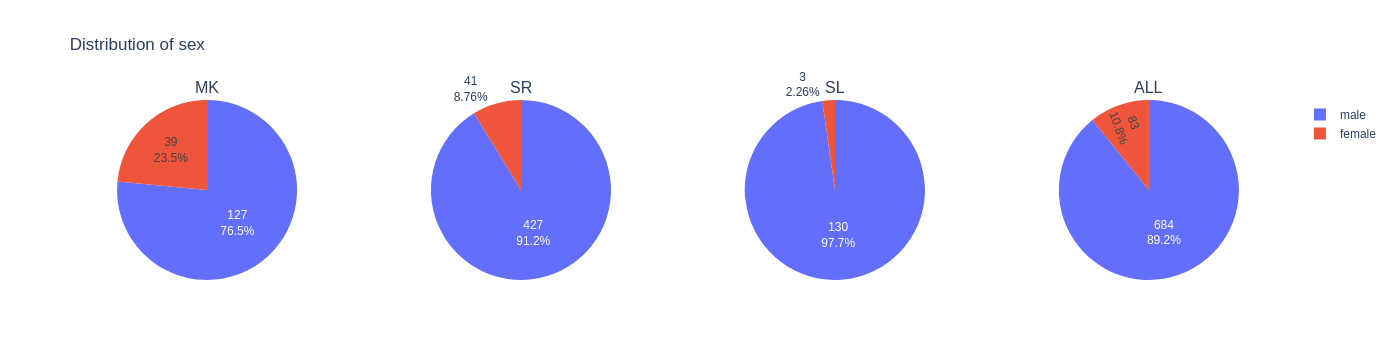

In [7]:
rows, cols = 1, 4
fig = make_subplots(rows=rows, cols=cols, specs=[[{'type': 'domain'}]*cols]*rows, subplot_titles=STATES_ALL)
for index, state in enumerate(STATES_ALL):
    value_counts = vc_sex[state]
    fig.add_trace(go.Pie(labels=value_counts.index.tolist(), values=value_counts.values.ravel()), row=1+index//cols, col=1+index%cols)
fig.update_layout(title_text='Distribution of sex')
fig.update_traces(textinfo='value+percent')
save_image(fig, 'by_sex')
fig

# Профил

In [8]:
vc_profiles = {s: pd.read_csv(f'csv/{s}_profiles.csv', index_col=0) for s in STATES}
vc_profiles['ALL'] = vc_profiles['MK'].add(vc_profiles['SR'], fill_value=0).add(vc_profiles['SL'], fill_value=0).astype(int)
vc_profiles

{'MK':                             0
 Computer Science          101
 Electronics                98
 Automatics                 60
 Telecomunications          57
 Another Technical School    8
 Power Engineering           6
 Gymnasium                   3,
 'SR':                                 0
 Computer Science              273
 Electronics                   149
 Automatics                     43
 Power Engineering              43
 Another Technical School       26
 Telecomunications              24
 Another Non-Technical School    1
 Gymnasium                       1,
 'SL':                                0
 Computer Science              79
 Another Technical School      37
 Power Engineering             19
 Electronics                   16
 Automatics                     8
 Another Non-Technical School   3
 Gymnasium                      3
 Telecomunications              1,
 'ALL':                                 0
 Another Non-Technical School    4
 Another Technical School       7

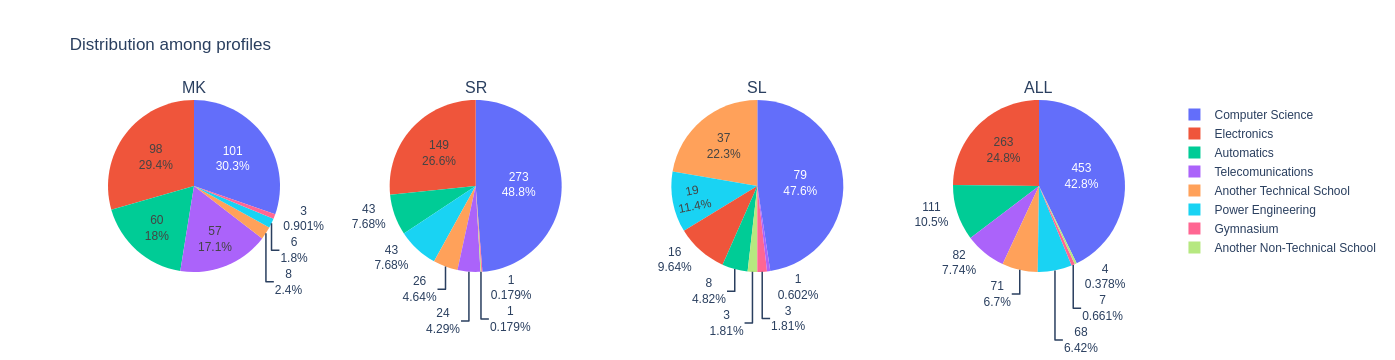

In [9]:
rows, cols = 1, 4
fig = make_subplots(rows=rows, cols=cols, specs=[[{'type': 'domain'}]*cols]*rows, subplot_titles=STATES_ALL)
for index, state in enumerate(STATES_ALL):
    value_counts = vc_profiles[state]
    fig.add_trace(go.Pie(labels=value_counts.index.tolist(), values=value_counts.values.ravel()), row=1+index//cols, col=1+index%cols)
fig.update_layout(title_text='Distribution among profiles')
fig.update_traces(textinfo='value+percent')
save_image(fig, 'by_profile')
fig

# Каде сте слушнале

In [10]:
vc_heard = {s: pd.read_csv(f'csv/{s}_heard.csv', index_col=0) for s in STATES}
vc_heard['ALL'] = vc_heard['MK'].add(vc_heard['SR'], fill_value=0).add(vc_heard['SL'], fill_value=0).astype(int)
vc_heard

{'MK':                       DS  ML
 At School             43  51
 From a friend         14  19
 In media               9  12
 Never heard about it  51  35
 On the internet       89  82,
 'SR':                        DS   ML
 At School              31   41
 From a friend          22   23
 In media               19   28
 Never heard about it  281  199
 On the internet       173  198,
 'SL':                       DS  ML
 At School             31  33
 From a friend         11  10
 In media               4  13
 Never heard about it  75  66
 On the internet       43  50,
 'ALL':                        DS   ML
 At School             105  125
 From a friend          47   52
 In media               32   53
 Never heard about it  407  300
 On the internet       305  330}

In [11]:
dft = pd.DataFrame([])
from functools import reduce
for column in ['DS', 'ML']:
    r = reduce(lambda a, b: a+b, [vc_heard[state][column] for state in STATES])
    dft[column] = r
dft

DS   ML
At School             105  125
From a friend          47   52
In media               32   53
Never heard about it  407  300
On the internet       305  330

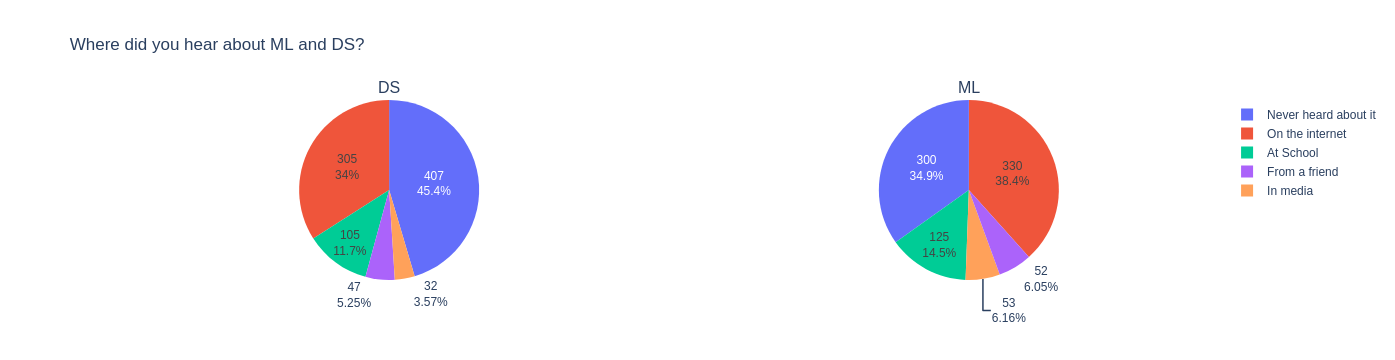

In [12]:
rows, cols = 1, 2
fig = make_subplots(rows=rows, cols=cols, specs=[[{'type': 'domain'}]*cols]*rows, subplot_titles=['DS', 'ML'])
for index, column in enumerate(['DS', 'ML']):
    value_counts = dft[column]
    fig.add_trace(go.Pie(labels=value_counts.index.tolist(), values=value_counts.values.ravel()), row=1+index//cols, col=1+index%cols)
fig.update_layout(title_text='Where did you hear about ML and DS?')
fig.update_traces(textinfo='value+percent')
save_image(fig, 'heard')
fig

# Љубопитност

In [13]:
vc_curiosity = {s: pd.read_csv(f'csv/{s}_curiosity.csv', index_col=0, names=['DS', 'ML', 'STATS'], skiprows=1) for s in STATES}
vc_curiosity

{'MK':     DS  ML  STATS
 1    5   5      6
 10  30  34     17
 2    2   2      3
 3    5   3     10
 4    5   7     11
 5   32  24     23
 6   16  15     27
 7   36  26     29
 8   21  28     26
 9   10  18     10,
 'SR':     DS  ML  STATS
 1   96  95     97
 10  46  60     50
 2   21  18     14
 3   22  29     25
 4   32  23     30
 5   85  77     80
 6   38  39     51
 7   59  61     55
 8   39  37     32
 9   10  10     16,
 'SL':     DS  ML  STATS
 1   26  21     24
 10   7  14      6
 2    7   7     10
 3   12   7     11
 4   16  19     17
 5   28  26     29
 6   11  11     11
 7   17  13     11
 8    7   9     10
 9    2   6      4}

In [14]:
dft = pd.DataFrame([])
from functools import reduce
for column in ['DS', 'ML', 'STATS']:
    r = reduce(lambda a, b: a+b, [vc_curiosity[state][column] for state in STATES])
    dft[column] = r
dft.sort_index(inplace=True)
dft

DS   ML  STATS
1   127  121    127
2    30   27     27
3    39   39     46
4    53   49     58
5   145  127    132
6    65   65     89
7   112  100     95
8    67   74     68
9    22   34     30
10   83  108     73

In [15]:
dft2 = dft.reset_index()
dft2['STATS_full'] = dft2['STATS'] * dft2['index']
dft2['STATS_full'] = dft2['STATS_full'] / dft2['STATS'].sum()
dft2['STATS_full'].sum()
dft2

index   DS   ML  STATS  STATS_full
0      1  127  121    127    0.170470
1      2   30   27     27    0.072483
2      3   39   39     46    0.185235
3      4   53   49     58    0.311409
4      5  145  127    132    0.885906
5      6   65   65     89    0.716779
6      7  112  100     95    0.892617
7      8   67   74     68    0.730201
8      9   22   34     30    0.362416
9     10   83  108     73    0.979866

In [16]:
l_ml = []
l_ds = []
l_stats = []
dft2 = dft.reset_index()
for a in dft2.itertuples():
    l_ml += [a.Index] * a.ML
    l_ds += [a.Index] * a.DS
    l_stats += [a.Index] * a.STATS

In [17]:
pd.DataFrame(l_ds).describe()

0
count  743.000000
mean     4.355316
std      2.834186
min      0.000000
25%      2.000000
50%      4.000000
75%      6.000000
max      9.000000

In [18]:
pd.DataFrame(l_ml).describe()

0
count  744.000000
mean     4.633065
std      2.948829
min      0.000000
25%      2.000000
50%      5.000000
75%      7.000000
max      9.000000

In [19]:
pd.DataFrame(l_stats).describe()

0
count  745.000000
mean     4.307383
std      2.799916
min      0.000000
25%      2.000000
50%      4.000000
75%      6.000000
max      9.000000

In [20]:
pd.DataFrame(l_ml + l_ds + l_stats).describe()

0
count  2232.000000
mean      4.431900
std       2.863991
min       0.000000
25%       2.000000
50%       4.000000
75%       7.000000
max       9.000000

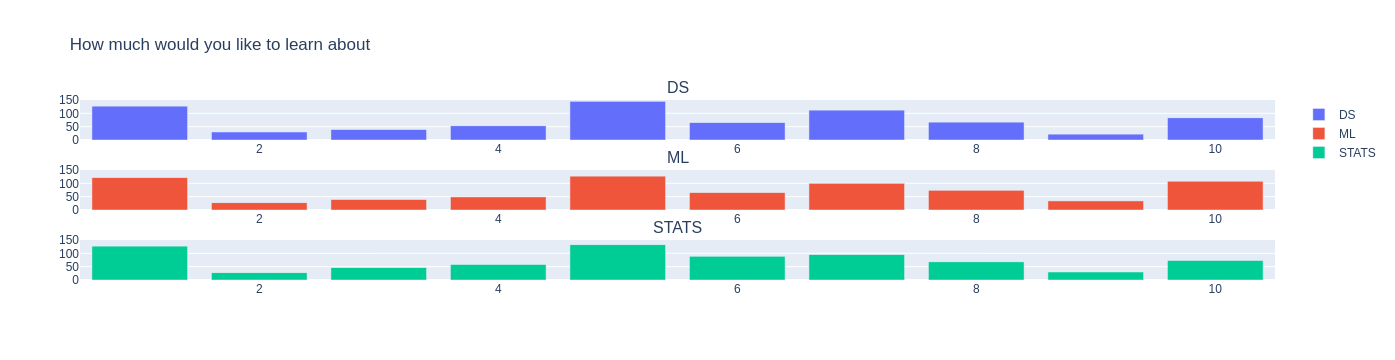

In [21]:
rows, cols = 3, 1
fig = make_subplots(rows=rows, cols=cols, subplot_titles=['DS', 'ML', 'STATS'], shared_yaxes=True)
for index, column in enumerate(['DS', 'ML', 'STATS']):
    value_counts = dft[column]
    fig.add_trace(go.Bar(x=value_counts.index.tolist(), y=value_counts.values, name=column), row=1+index//cols, col=1+index%cols)
    fig.update_yaxes(range=[0, 150], row=1+index//cols, col=1+index%cols)
fig.update_layout(title_text='How much would you like to learn about')
save_image(fig, 'curiosity_bar')
fig

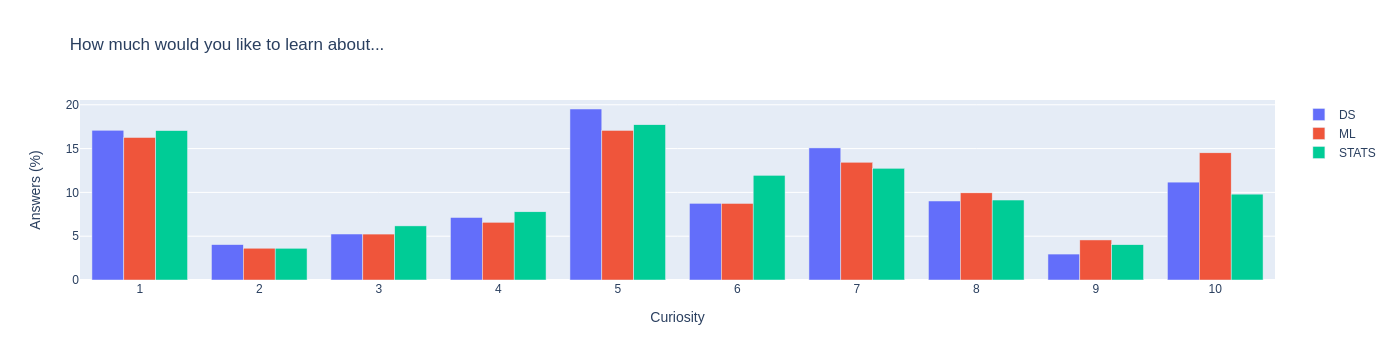

In [22]:
indexes = dft.index.tolist()
fig = go.Figure(data=[
    go.Bar(name='DS', x=indexes, y=dft.DS.values/dft.DS.sum()*100),
    go.Bar(name='ML', x=indexes, y=dft.ML.values/dft.ML.sum()*100),
    go.Bar(name='STATS', x=indexes, y=dft.STATS.values/dft.STATS.sum()*100),
])
fig.update_layout(barmode='group', title_text='How much would you like to learn about...',
                  xaxis=dict(dtick=1, title='Curiosity'), yaxis=dict(title='Answers (%)'))
save_image(fig, 'curiosity_bar')
fig

# Туторијали

In [23]:
vc_tutorial = {s: pd.read_csv(f'csv/{s}_tutorials.csv', usecols=[1]).sort_index(ascending=False) for s in STATES}
vc_tutorial['ALL'] = vc_tutorial['MK'].add(vc_tutorial['SR'], fill_value=0).add(vc_tutorial['SL'], fill_value=0).astype(int)
for k, v in vc_tutorial.items():
    v.rename(index={0: 'No', 1: 'Yes'}, inplace=True)
vc_tutorial

{'MK':      DS_ML_tutorials
 Yes                8
 No               155,
 'SR':      DS_ML_tutorials
 Yes               39
 No               475,
 'SL':      DS_ML_tutorials
 Yes               20
 No               114,
 'ALL':      DS_ML_tutorials
 Yes               67
 No               744}

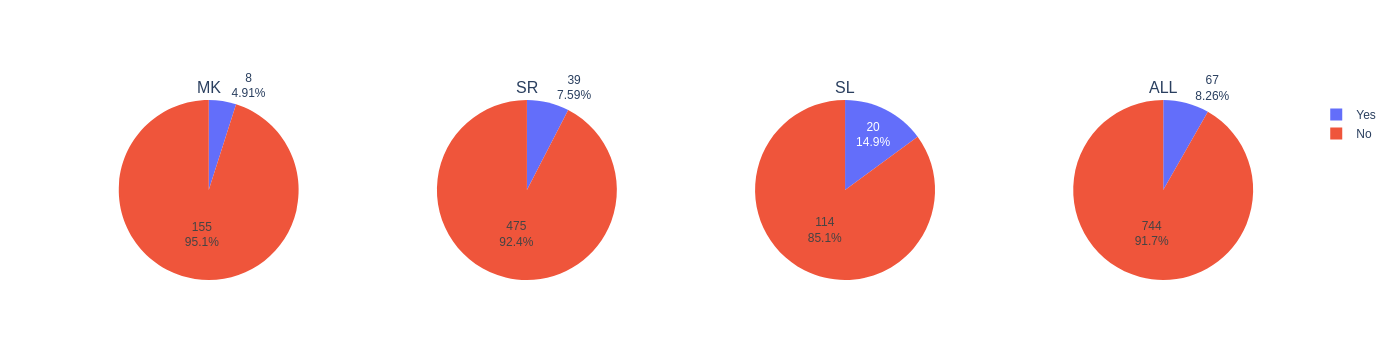

In [24]:
rows, cols = 1, 4
fig = make_subplots(rows=rows, cols=cols, specs=[[{'type': 'domain'}]*cols]*rows, subplot_titles=STATES_ALL)
for index, state in enumerate(STATES_ALL):
    value_counts = vc_tutorial[state]
    fig.add_trace(go.Pie(labels=value_counts.index.tolist(), values=value_counts.values.ravel(), sort=False), row=1+index//cols, col=1+index%cols)
fig.update_traces(textinfo='value+percent')
save_image(fig, 'by_tutorials')
fig

# Пајтон

In [25]:
vc_tutorial = {s: pd.read_csv(f'csv/{s}_python.csv', usecols=[1]).sort_index(ascending=False) for s in STATES}
vc_tutorial['ALL'] = vc_tutorial['MK'].add(vc_tutorial['SR'], fill_value=0).add(vc_tutorial['SL'], fill_value=0).astype(int)
for k, v in vc_tutorial.items():
    v.rename(index={0: 'No', 1: 'Yes'}, inplace=True)
vc_tutorial

{'MK':      CODING_python
 Yes             30
 No             134,
 'SR':      CODING_python
 Yes            162
 No             353,
 'SL':      CODING_python
 Yes             63
 No              71,
 'ALL':      CODING_python
 Yes            255
 No             558}

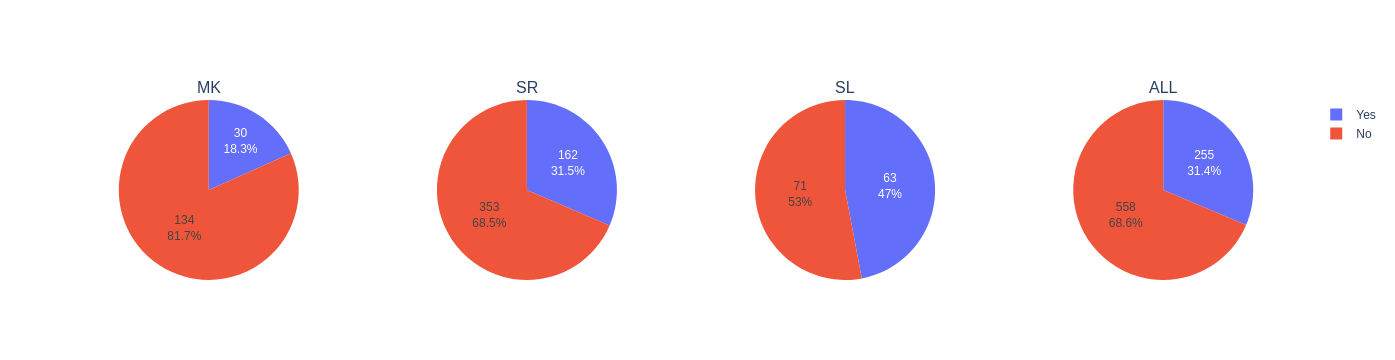

In [26]:
rows, cols = 1, 4
fig = make_subplots(rows=rows, cols=cols, specs=[[{'type': 'domain'}]*cols]*rows, subplot_titles=STATES_ALL)
for index, state in enumerate(STATES_ALL):
    value_counts = vc_tutorial[state]
    fig.add_trace(go.Pie(labels=value_counts.index.tolist(), values=value_counts.values.ravel(), sort=False), row=1+index//cols, col=1+index%cols)
fig.update_traces(textinfo='value+percent')
save_image(fig, 'by_python')
fig

# Учење

In [27]:
vc_how_to_learn = {s: pd.read_csv(f'csv/{s}_how_to_learn.csv', index_col=0) for s in STATES}
vc_how_to_learn['ALL'] = vc_how_to_learn['MK'].add(vc_how_to_learn['SR'], fill_value=0).add(vc_how_to_learn['SL'], fill_value=0).astype(int)
vc_how_to_learn

{'MK':                         0
 LP_how_to_learn          
 live lectures         134
 course books          120
 lecture notes/slides   55
 online lectures        48
 videos                 46
 demos                  18
 audiobooks             16,
 'SR':                         0
 LP_how_to_learn          
 live lectures         374
 online lectures       191
 videos                165
 lecture notes/slides  161
 course books          135
 demos                  90
 audiobooks             61,
 'SL':                        0
 LP_how_to_learn         
 live lectures         81
 videos                70
 lecture notes/slides  67
 online lectures       59
 demos                 48
 course books          22
 audiobooks            13,
 'ALL':                         0
 LP_how_to_learn          
 audiobooks             90
 course books          277
 demos                 156
 lecture notes/slides  283
 live lectures         589
 online lectures       298
 videos                281}

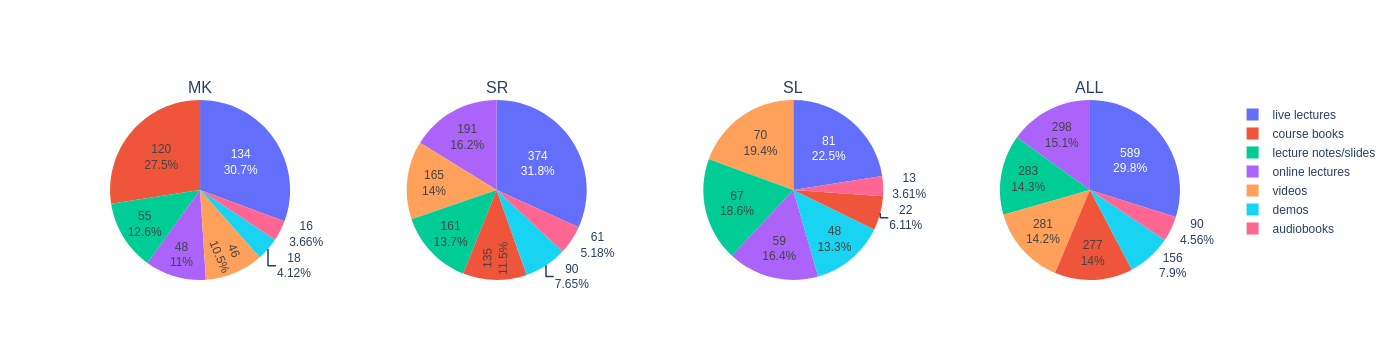

In [28]:
rows, cols = 1, 4
fig = make_subplots(rows=rows, cols=cols, specs=[[{'type': 'domain'}]*cols]*rows, subplot_titles=STATES_ALL)
for index, state in enumerate(STATES_ALL):
    value_counts = vc_how_to_learn[state]
    fig.add_trace(go.Pie(labels=value_counts.index.tolist(), values=value_counts.values.ravel()), row=1+index//cols, col=1+index%cols)
fig.update_traces(textinfo='value+percent')
save_image(fig, 'by_how_to_learn')
fig

# Универзитет

In [29]:
vc_university = {s: pd.read_csv(f'csv/{s}_university.csv', index_col=0) for s in STATES}
vc_university['ALL'] = vc_university['MK'].add(vc_university['SR'], fill_value=0).add(vc_university['SL'], fill_value=0).astype(int)
vc_university

{'MK':      University
 No           20
 Yes         144,
 'SR':      University
 No          135
 Yes         380,
 'SL':      University
 No           46
 Yes          88,
 'ALL':      University
 No          201
 Yes         612}

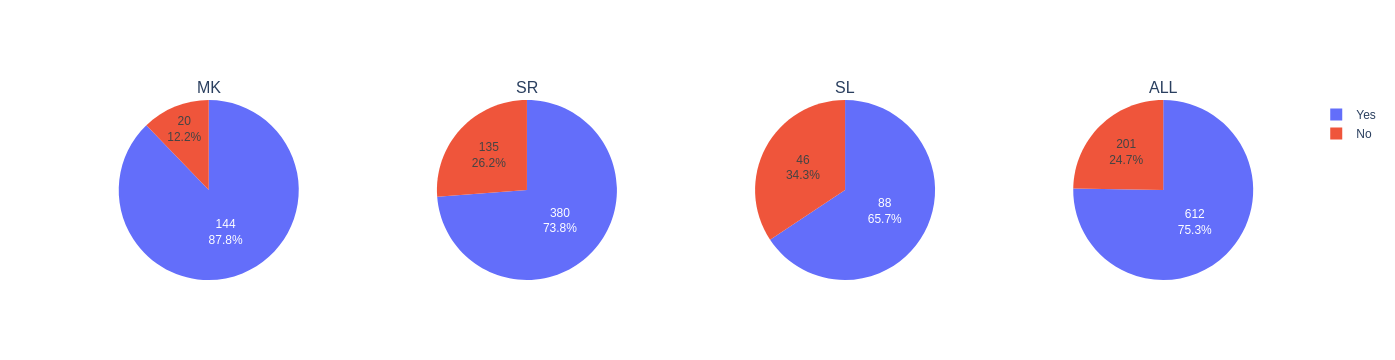

In [30]:
rows, cols = 1, 4
fig = make_subplots(rows=rows, cols=cols, specs=[[{'type': 'domain'}]*cols]*rows, subplot_titles=STATES_ALL)
for index, state in enumerate(STATES_ALL):
    value_counts = vc_university[state]
    fig.add_trace(go.Pie(labels=value_counts.index.tolist(), values=value_counts.values.ravel()), row=1+index//cols, col=1+index%cols)
fig.update_traces(textinfo='value+percent')
save_image(fig, 'by_university')
fig